In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("lending_club_loan_two.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


### **Getting the columns wih numeric data**

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
numerical_cols=newdf.columns.tolist()
print(numerical_cols)

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']


In [8]:
target="loan_status"
df[target]

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

### **Class Imbalance**
**The number of records for "fully paid" status is more than two times that of "charged off"**

<Axes: xlabel='loan_status', ylabel='count'>

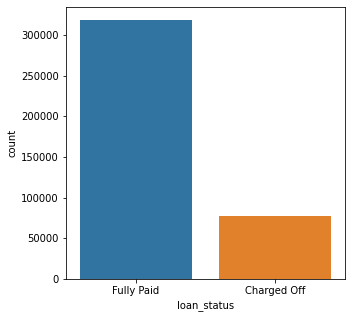

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(x = df[target])

### **Plotting relations between each of the columns containing numerical data vs the target variable**

In [10]:
def make_boxplot(x):
  plt.figure(figsize=(10,10))
  title= x+" vs "+"Loan status"
  sns.boxplot(x=df['loan_status'],y=df[x]).set(title=title)
  plt.show()


In [11]:
def boxplot_describe(x):
  print(df.groupby('loan_status')[x].describe())

Boxplot


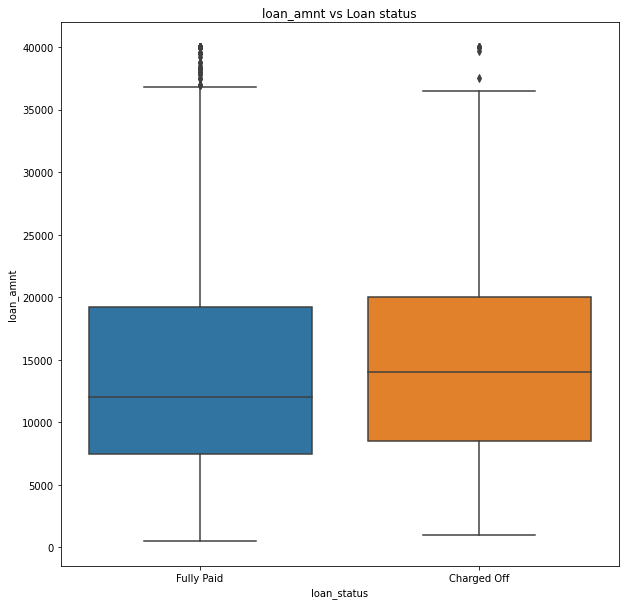

-----------------------------------------------------------------------------------------------------------------------------
Boxplot description for  loan_amnt
                count          mean          std     min     25%      50%  \
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                 75%      max  
loan_status                    
Charged Off  20000.0  40000.0  
Fully Paid   19225.0  40000.0  
Boxplot


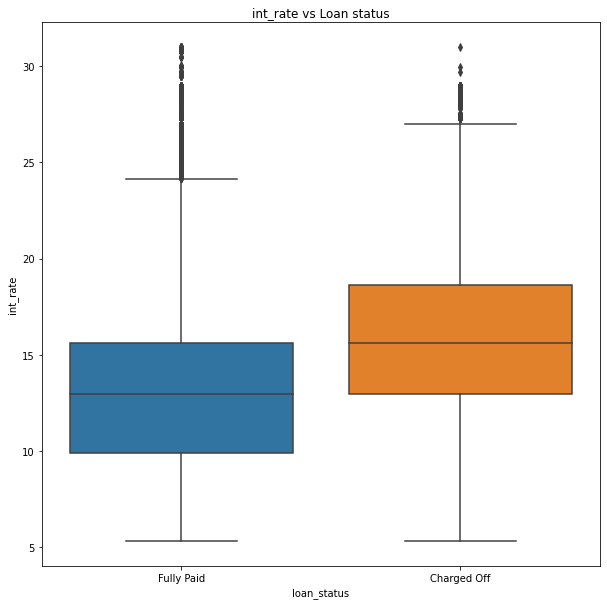

-----------------------------------------------------------------------------------------------------------------------------
Boxplot description for  int_rate
                count       mean       std   min    25%    50%    75%    max
loan_status                                                                 
Charged Off   77673.0  15.882587  4.388135  5.32  12.99  15.61  18.64  30.99
Fully Paid   318357.0  13.092105  4.319105  5.32   9.91  12.99  15.61  30.99
Boxplot


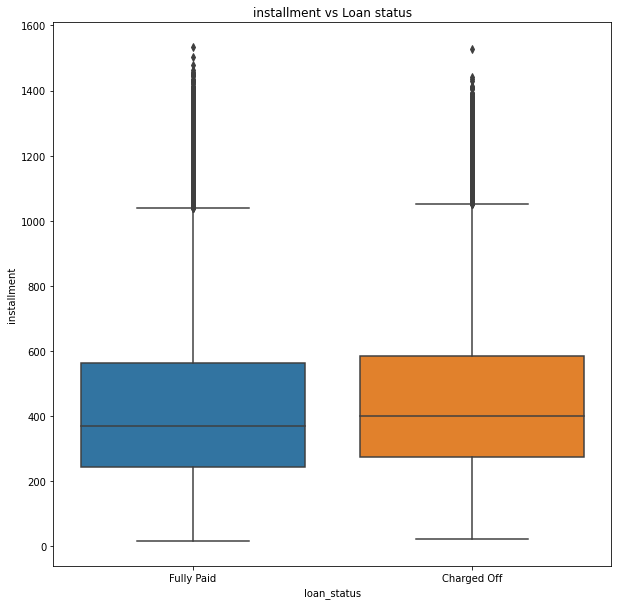

-----------------------------------------------------------------------------------------------------------------------------
Boxplot description for  installment
                count        mean         std    min     25%     50%     75%  \
loan_status                                                                    
Charged Off   77673.0  452.703110  249.096609  21.62  274.86  399.06  585.67   
Fully Paid   318357.0  426.761866  250.861622  16.08  244.46  369.51  562.89   

                 max  
loan_status           
Charged Off  1527.00  
Fully Paid   1533.81  
Boxplot


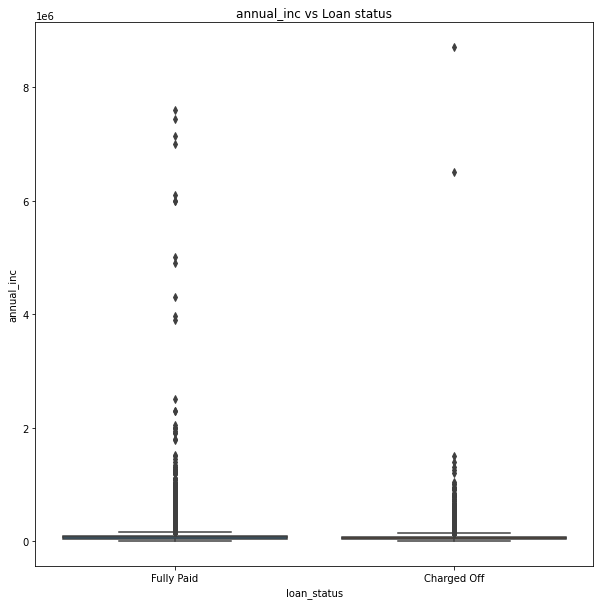

-----------------------------------------------------------------------------------------------------------------------------
Boxplot description for  annual_inc
                count          mean           std    min       25%      50%  \
loan_status                                                                   
Charged Off   77673.0  67535.537710  58303.457136    0.0  42000.00  59000.0   
Fully Paid   318357.0  75829.951566  62315.991907  600.0  46050.53  65000.0   

                 75%        max  
loan_status                      
Charged Off  80000.0  8706582.0  
Fully Paid   90000.0  7600000.0  
Boxplot


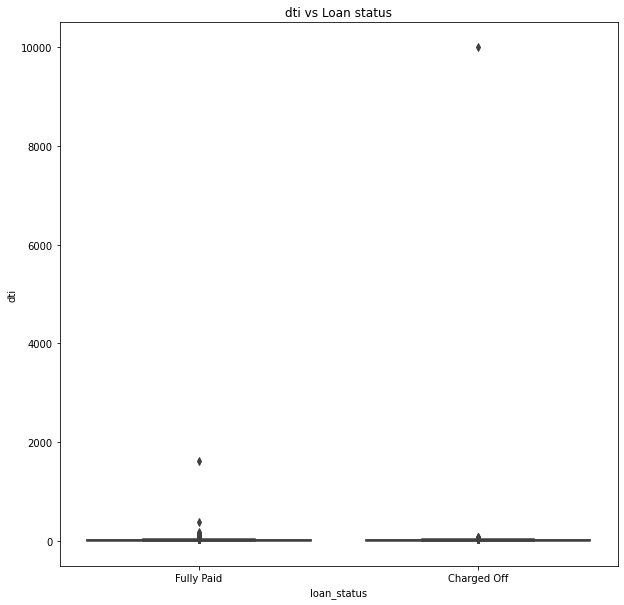

-----------------------------------------------------------------------------------------------------------------------------
Boxplot description for  dti
                count       mean        std  min    25%    50%    75%     max
loan_status                                                                  
Charged Off   77673.0  19.656346  36.781068  0.0  13.33  19.34  25.55  9999.0
Fully Paid   318357.0  16.824010   8.500979  0.0  10.87  16.34  22.29  1622.0
Boxplot


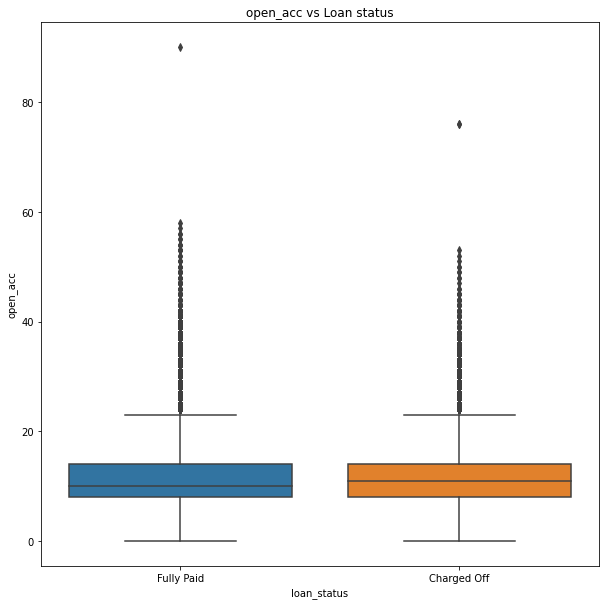

-----------------------------------------------------------------------------------------------------------------------------
Boxplot description for  open_acc
                count       mean       std  min  25%   50%   75%   max
loan_status                                                           
Charged Off   77673.0  11.602513  5.288507  0.0  8.0  11.0  14.0  76.0
Fully Paid   318357.0  11.240067  5.097647  0.0  8.0  10.0  14.0  90.0
Boxplot


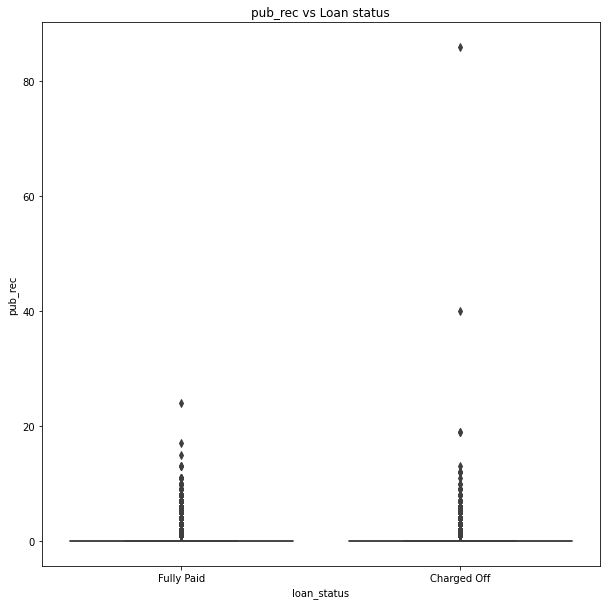

-----------------------------------------------------------------------------------------------------------------------------
Boxplot description for  pub_rec
                count      mean       std  min  25%  50%  75%   max
loan_status                                                        
Charged Off   77673.0  0.199606  0.648283  0.0  0.0  0.0  0.0  86.0
Fully Paid   318357.0  0.172966  0.497637  0.0  0.0  0.0  0.0  24.0
Boxplot


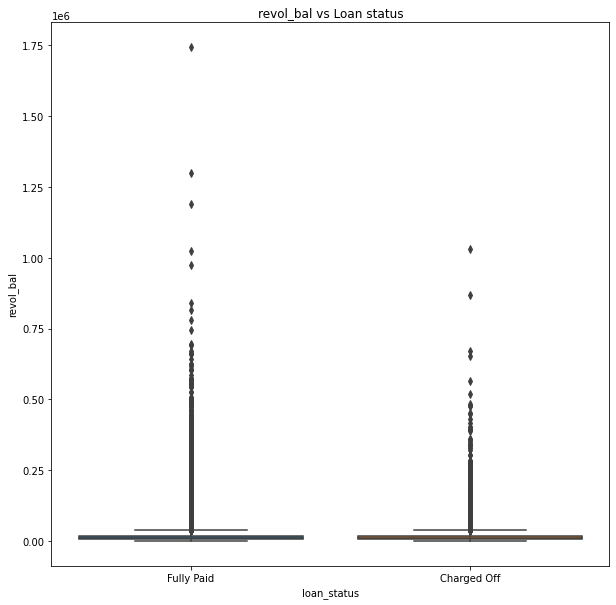

-----------------------------------------------------------------------------------------------------------------------------
Boxplot description for  revol_bal
                count          mean           std  min     25%      50%  \
loan_status                                                               
Charged Off   77673.0  15390.454701  18203.387930  0.0  6150.0  11277.0   
Fully Paid   318357.0  15955.327918  21132.193457  0.0  5992.0  11158.0   

                 75%        max  
loan_status                      
Charged Off  19485.0  1030826.0  
Fully Paid   19657.0  1743266.0  
Boxplot


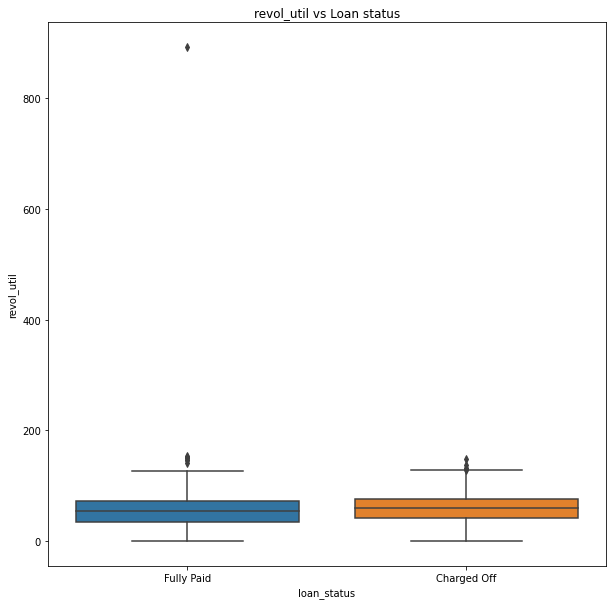

-----------------------------------------------------------------------------------------------------------------------------
Boxplot description for  revol_util
                count       mean        std  min   25%   50%   75%    max
loan_status                                                              
Charged Off   77610.0  57.869824  23.492176  0.0  41.2  59.3  76.2  148.0
Fully Paid   318144.0  52.796918  24.578304  0.0  34.6  53.7  72.0  892.3
Boxplot


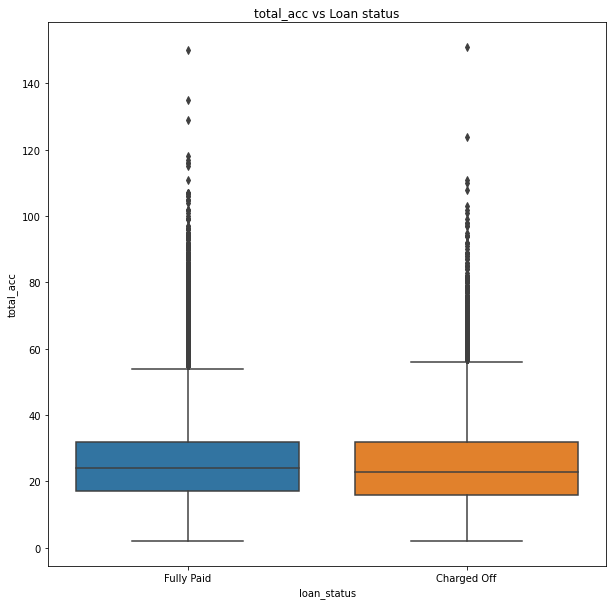

-----------------------------------------------------------------------------------------------------------------------------
Boxplot description for  total_acc
                count       mean        std  min   25%   50%   75%    max
loan_status                                                              
Charged Off   77673.0  24.984152  11.913692  2.0  16.0  23.0  32.0  151.0
Fully Paid   318357.0  25.519800  11.878117  2.0  17.0  24.0  32.0  150.0
Boxplot


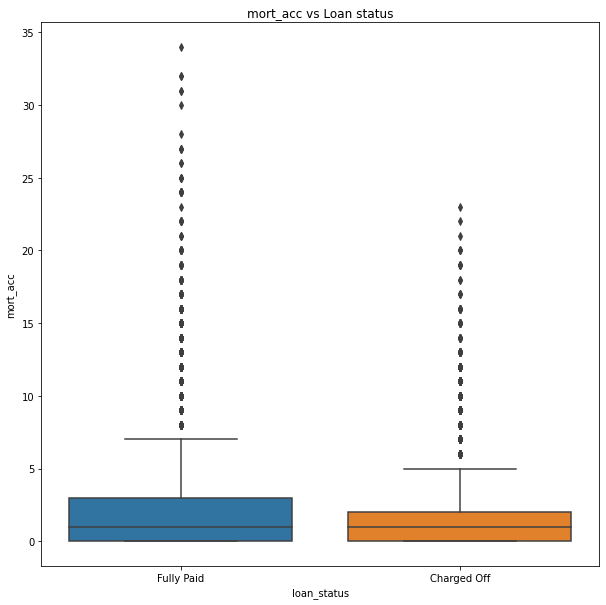

-----------------------------------------------------------------------------------------------------------------------------
Boxplot description for  mort_acc
                count      mean       std  min  25%  50%  75%   max
loan_status                                                        
Charged Off   72123.0  1.501213  1.974353  0.0  0.0  1.0  2.0  23.0
Fully Paid   286112.0  1.892836  2.182456  0.0  0.0  1.0  3.0  34.0
Boxplot


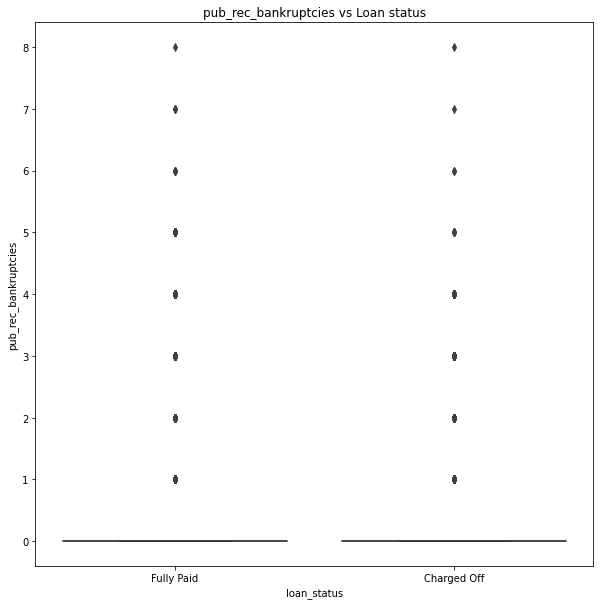

-----------------------------------------------------------------------------------------------------------------------------
Boxplot description for  pub_rec_bankruptcies
                count      mean       std  min  25%  50%  75%  max
loan_status                                                       
Charged Off   77586.0  0.128412  0.368853  0.0  0.0  0.0  0.0  8.0
Fully Paid   317909.0  0.119997  0.352992  0.0  0.0  0.0  0.0  8.0


In [12]:
for numerical in numerical_cols:
  print("=============================================================================================================================")
  print("=============================================================================================================================")
  print("=============================================================================================================================")

  print("Boxplot")
  make_boxplot(numerical)

  print("-----------------------------------------------------------------------------------------------------------------------------")


  
  print("Boxplot description for ", numerical)
  boxplot_describe(numerical)

**Inference**

**From the above boxplots,we notice that the difference in the borrowers' loan status for the features "loan_amt", "int_rate" and "installments" is significant than the rest.**

**We also have many outliers and hence we need to handle them post train-test split.**

### **Correlation matrix**

<Axes: >

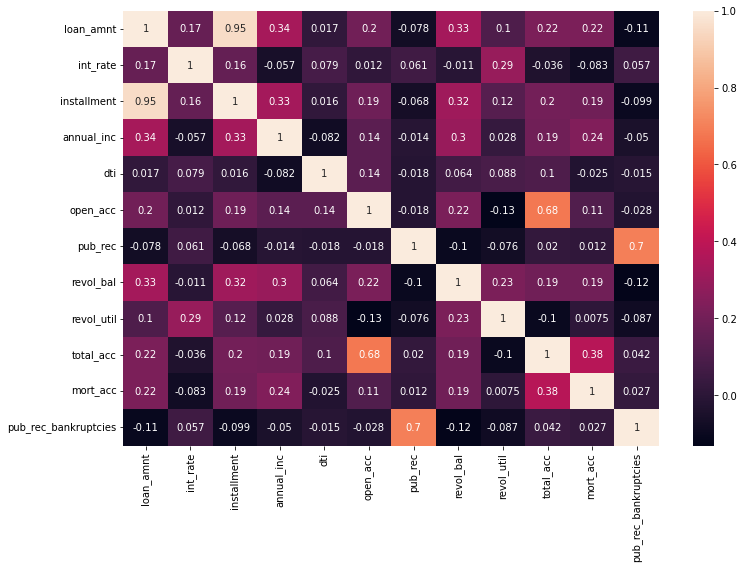

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

### **Inference:**
**Highest correlation is there between loan_amt and installment. If the loan amount is more, installments will be more**

**pub_rec_bankruptcies and pub_rec are higly corelated.**

**total_acc and open_acc are highly corelated.**




**We further investigate the trend for loan_amt and installment with the loan status.**

In [19]:
bins = [0, 10000, 20000, 30000, 40000]
group_name = ['Very Low Loan', 'Low Loan', 'Average Loan', 'High Loan']

df['Loan_amount_divided'] = pd.cut(df['loan_amnt'], bins = bins,labels = group_name)
df['Loan_amount_divided']

0         Very Low Loan
1         Very Low Loan
2              Low Loan
3         Very Low Loan
4          Average Loan
              ...      
396025    Very Low Loan
396026     Average Loan
396027    Very Low Loan
396028     Average Loan
396029    Very Low Loan
Name: Loan_amount_divided, Length: 396030, dtype: category
Categories (4, object): ['Very Low Loan' < 'Low Loan' < 'Average Loan' < 'High Loan']

### **Relation between loan_amnt and installments seen for the two types of borrowers**

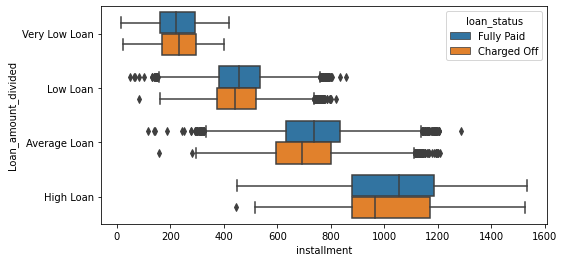

In [21]:


encode_dict = {'Charged Off':1, 'Fully Paid':0}
plt.figure(figsize = (8,4))
sns.boxplot(data = df, x = 'installment', y = 'Loan_amount_divided',  hue = 'loan_status')
plt.show()

**From the above boxplot we observe that, when the loan borrowed(loan amount) is in the lower range,the installments in form of the monthly payment owed by the borrower is similar for both types of borrowers(defaulted and who had fully paaid the loan)**

**As the loan amount increases, the installments by the defaulters decreases as compared to the installments by the honest borrowers who are not defaulting.**